# Diabetes Classification Problem

In this project, I worked to analyze the diabetes dataset and predict patients' diabetes status using classification models. In the first step, you examined the dataset and checked for missing values. The dataset included various characteristics such as gender, age, blood pressure, heart disease, smoking history, body mass index (BMI), HbA1c level, and blood glucose level.

Next, we used various graphs to visualize the dataset.
m. Scatter plots showed how diabetes was distributed by gender, blood pressure, heart disease, and smoking history. I also created a histogram that shows the prevalence of diabetes by age.

I prepared the data to process the dataset with classification models. We used LabelEncoder to convert categorical variables to numeric values and then split the data into training and test sets. I implemented classification algorithms using Logistic Regression, Random Forest, SVM (Support Vector Machines), LightGBM and TensorFlow to train the models.

Finally, I evaluated the performance of each model. We measured the success of the models using metrics such as accuracy, precision, recall, F1 score, AUC-ROC score and MSE. These metrics helped me evaluate performance measures such as model accuracy, precision, sensitivity, F1 score, area under the ROC curve, and mean square error (MSE).

Kaggle Data Set:https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df = pd.read_csv("diabetes_prediction_dataset.csv")
df


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [36]:
print("Data Shape:")
print(df.shape)

Data Shape:
(100000, 9)


In [37]:
print("\nData Columns:")
print(df.columns)


Data Columns:
Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')


In [38]:
print("\nData types:")
print(df.info())


Data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None


In [39]:
print("\nData Summary:")
pd.DataFrame(df.describe())


Data Summary:


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [40]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [41]:
# Check for duplicate rows
print("\nDuplicate Rows:")
print(df.duplicated().sum())


Duplicate Rows:
3854


In [42]:
#Remove duplicated data
df = df.drop_duplicates(keep='first')

In [43]:
df.shape

(96146, 9)

In [44]:
# delete No info datas in Smoking_history Column
df = df[df['smoking_history'] != 'No Info']

In [45]:
df.shape

(63259, 9)

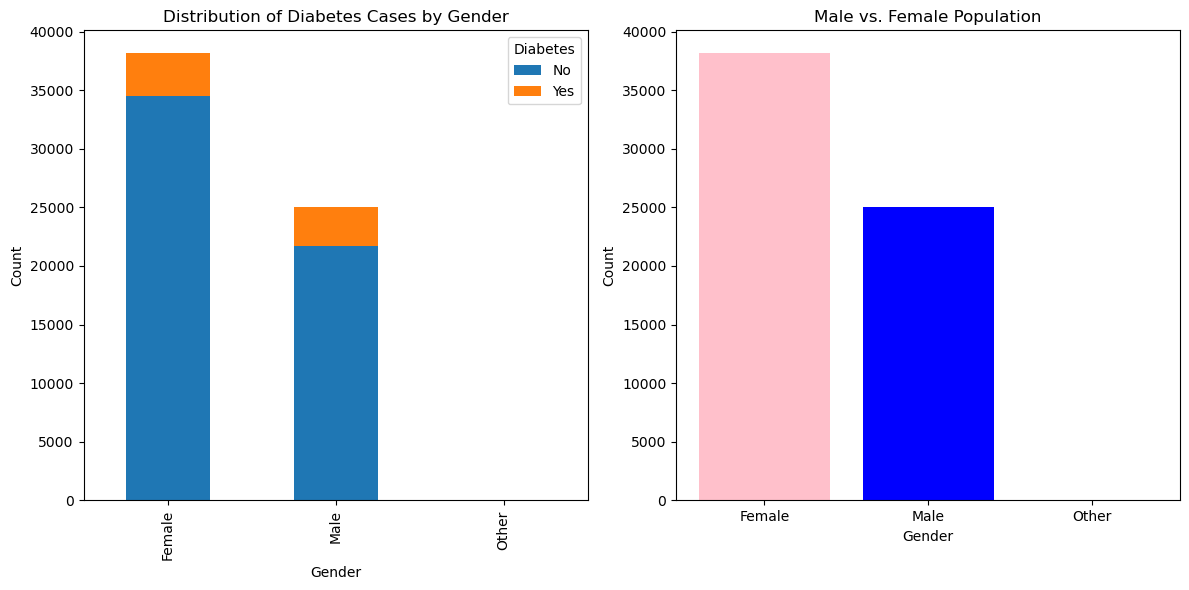

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot 1: Grouped bar plot - Distribution of diabetes cases by gender
diabetes_gender = df.groupby(['gender', 'diabetes']).size().unstack()
diabetes_gender.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')
axes[0].set_title('Distribution of Diabetes Cases by Gender')
axes[0].legend(title='Diabetes', labels=['No', 'Yes'])

# Plot 2: Bar plot - Male vs. Female population
gender_counts = df['gender'].value_counts()
colors = ['blue' if gender == 'Male' else 'pink' for gender in gender_counts.index]
axes[1].bar(gender_counts.index, gender_counts.values, color=colors)
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Count')
axes[1].set_title('Male vs. Female Population')

plt.tight_layout()
plt.show()





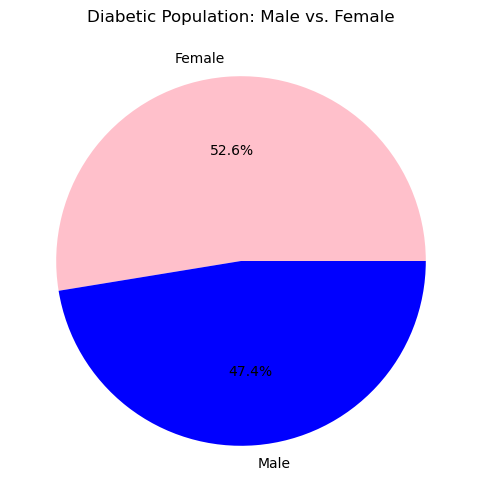

In [48]:
# Filtering the DataFrame to include only entries where 'diabetes' is 1
diabetic_population = df[df['diabetes'] == 1]

# Counting the diabetic population based on 'gender'
diabetic_gender_counts = diabetic_population['gender'].value_counts()

# Defining the colors
colors = ['blue' if gender == 'Male' else 'pink' for gender in diabetic_gender_counts.index]

# Creating the pie chart
plt.figure(figsize=(6,6))
plt.pie(diabetic_gender_counts, labels=diabetic_gender_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Diabetic Population: Male vs. Female')
plt.show()



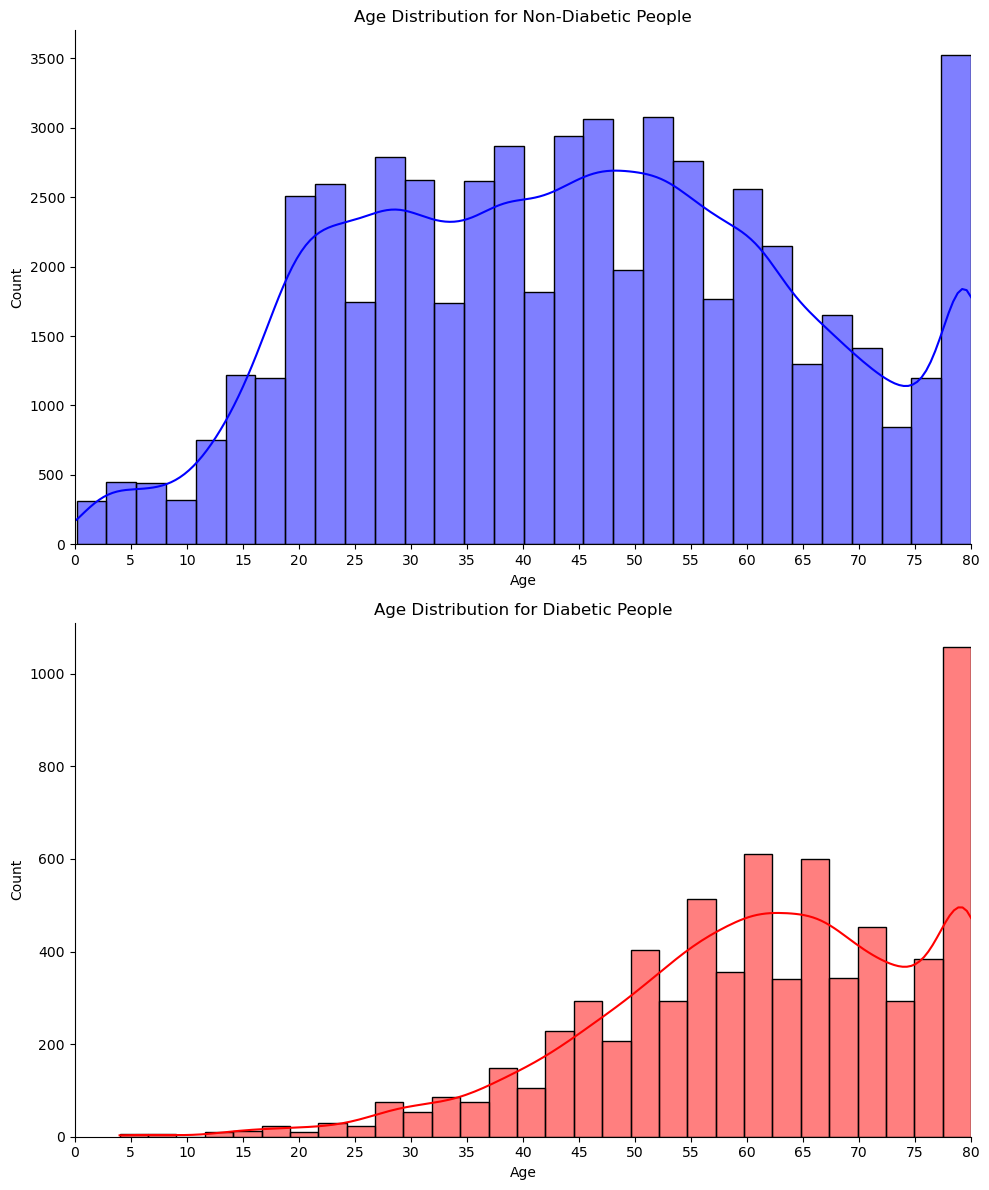

In [49]:
# Create a figure and a set of subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Plot 1: Histogram for non-diabetic people
sns.histplot(data=df[df['diabetes'] == 0], x='age', kde=True, bins=30, ax=axes[0], color='blue')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')
axes[0].set_title('Age Distribution for Non-Diabetic People')
axes[0].set_xlim([0, df['age'].max()]) # Adjust x-axis limit
axes[0].set_xticks(range(0, int(df['age'].max()) + 1, 5)) # Set x-axis tick interval

# Plot 2: Histogram for diabetic people
sns.histplot(data=df[df['diabetes'] == 1], x='age', kde=True, bins=30, ax=axes[1], color='red')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Count')
axes[1].set_title('Age Distribution for Diabetic People')
axes[1].set_xlim([0, df['age'].max()]) # Adjust x-axis limit
axes[1].set_xticks(range(0, int(df['age'].max()) + 1, 5)) # Set x-axis tick interval

# Remove top and right borders from both subplots
for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Adjust the space between subplots
plt.tight_layout()

# Display the plots
plt.show()


This code block creates two separate histograms to show the age distributions of diabetic and non-diabetic people. The first histogram represents the age distribution of non-diabetic people. It is shown in blue and the x-axis represents the ages and the y-axis represents the number of people that age. In addition, the KDE (Kernel Density Estimation) curve is used to visualize the density. This histogram is used to analyze the age distribution of non-diabetic people. The second histogram represents the age distribution of diabetic people. It is shown in red and likewise the x-axis represents the ages and the y-axis represents the number of people with that age. The KDE curve is used to visualize density. This histogram is used to analyze the age distribution of diabetic people. Thanks to these histograms, we can compare the age distributions of diabetic and non-diabetic people. We can see at which age ranges diabetes is more common and understand the age distribution of non-diabetic people in general. This visualization is important for understanding the age distribution of diabetic and non-diabetic people. Age can be an important factor in diabetes risk, and these histograms help us visually understand the effect of age on diabetes.

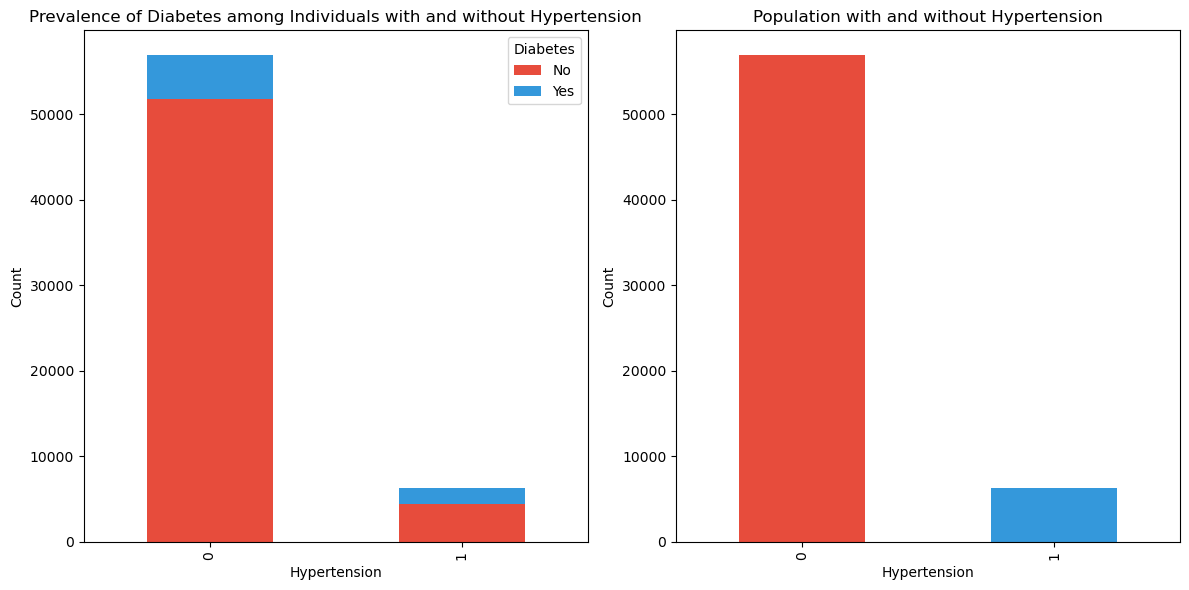

In [50]:
# Create a figure and a set of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot 1: Bar plot - Prevalence of Diabetes among Individuals with and without Hypertension
df.groupby('hypertension')['diabetes'].value_counts().unstack().plot(kind='bar', stacked=True, ax=axes[0], color=['#E74C3C', '#3498DB'])
axes[0].set_xlabel('Hypertension')
axes[0].set_ylabel('Count')
axes[0].set_title('Prevalence of Diabetes among Individuals with and without Hypertension')
axes[0].legend(title='Diabetes', labels=['No', 'Yes'])

# Plot 2: Bar plot - Population with and without Hypertension
df['hypertension'].value_counts().plot(kind='bar', ax=axes[1], color=['#E74C3C', '#3498DB'])
axes[1].set_xlabel('Hypertension')
axes[1].set_ylabel('Count')
axes[1].set_title('Population with and without Hypertension')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

This code block generates two different bar graphs to show the prevalence of diabetes among individuals with 'hypertension' and the distribution of the general population with and without hypertension. The first graph is a bar graph showing the presence of diabetes by the 'hypertension' feature. The bars represent the presence and absence of diabetes in individuals with and without high blood pressure. This chart shows the prevalence of diabetes by high blood pressure status. The second graph is a bar graph showing the distribution of the general population with and without the 'hypertension' feature. The bars represent the number of individuals with and without high blood pressure. Using this code block, we visualized the prevalence of diabetes among individuals with high blood pressure and the distribution of the general population with and without hypertension. While this helps us understand the relationship between high blood pressure and diabetes, it also shows the status of high blood pressure in the general population.

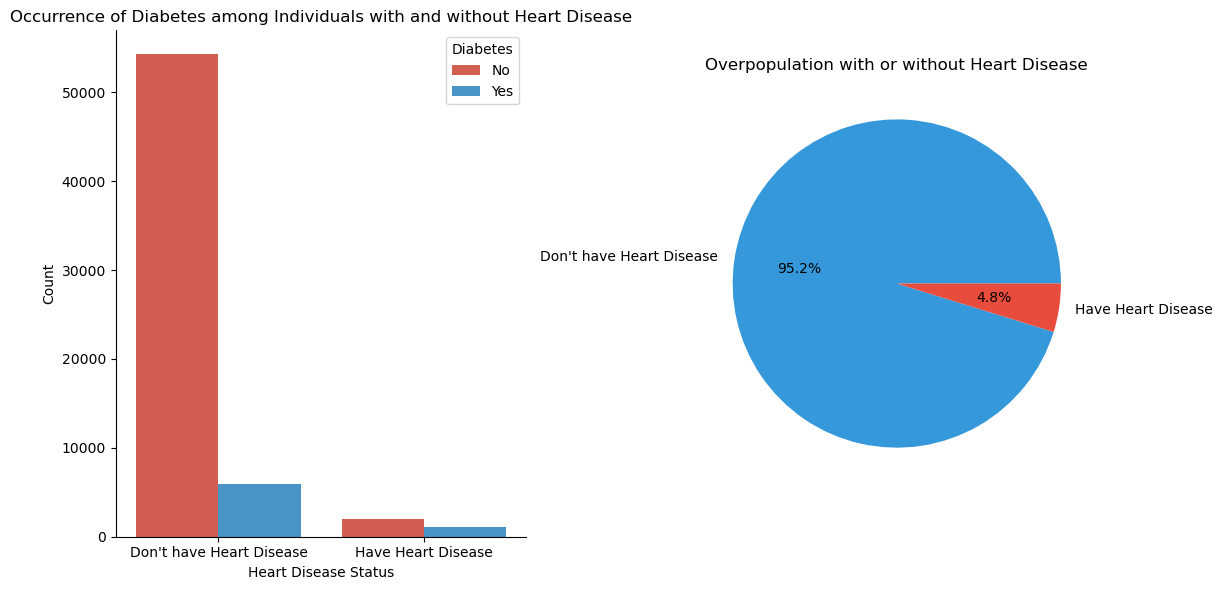

In [51]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Customize bar plot - Occurrence of Diabetes among Individuals with and without Heart Disease
sns.countplot(data=df, x='heart_disease', hue='diabetes', palette=['#E74C3C', '#3498DB'], ax=axs[0])
axs[0].set_xlabel('Heart Disease Status')
axs[0].set_ylabel('Count')
axs[0].set_title('Occurrence of Diabetes among Individuals with and without Heart Disease')
axs[0].legend(title='Diabetes', labels=['No', 'Yes'])
axs[0].spines['top'].set_visible(False) # Remove top border
axs[0].spines['right'].set_visible(False) # Remove right border

# Customize x axis labels
labels = [item.get_text() for item in axs[0].get_xticklabels()]
labels[0] = 'Don\'t have Heart Disease'
labels[1] = 'Have Heart Disease'
axs[0].set_xticklabels(labels)

# Customize pie plot - Overpopulation with or without Heart Disease
heart_disease_counts = df['heart_disease'].value_counts()
axs[1].pie(heart_disease_counts, labels=labels, autopct='%1.1f%%', colors=['#3498DB', '#E74C3C'])
axs[1].set_title('Overpopulation with or without Heart Disease')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


This code block generates two different graphs to show the occurrence of diabetes among individuals with the 'heart_disease' trait and the distribution of the general population with and without heart disease.The first graph is represented as a bar graph and shows the presence of diabetes according to the 'heart_disease' property. The bars indicate the presence and absence of diabetes with 'No' and 'Yes' labels. This chart shows the distribution of diabetes status among individuals with and without heart disease. The second graph is represented as a pie chart and shows the distribution of the general population with and without heart disease. The pie chart shows the percentage of individuals with and without heart disease. Using this code block, we visualized the distribution of diabetes among individuals with heart disease and the distribution of the general population with and without heart disease. While this helps us understand the relationship between heart disease and diabetes, it also shows the heart disease status in the general population. Using images, we can better understand how common diabetes is among those with heart disease and the proportion of individuals with and without heart disease in the general population. These visualizations are an important step towards analyzing the heart disease and diabetes status in the dataset and understanding the relationships involved. 

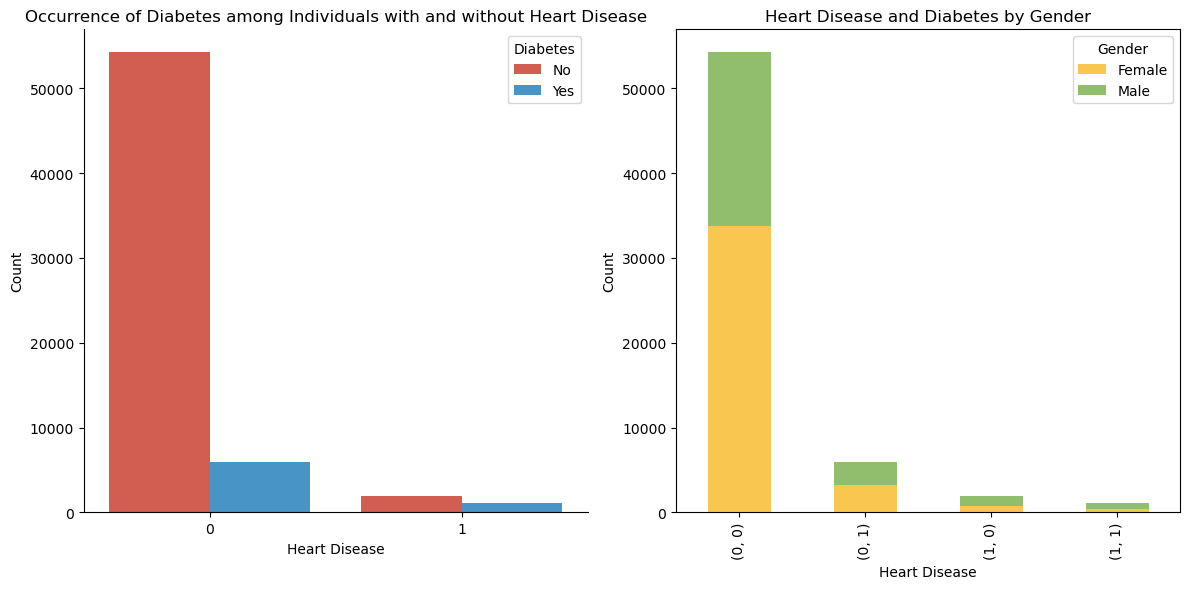

In [69]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Customize bar plot - Occurrence of Diabetes among Individuals with and without Heart Disease
sns.countplot(data=df_gender, x='heart_disease', hue='diabetes', palette=['#E74C3C', '#3498DB'], ax=axs[0])
axs[0].set_xlabel('Heart Disease')
axs[0].set_ylabel('Count')
axs[0].set_title('Occurrence of Diabetes among Individuals with and without Heart Disease')
axs[0].legend(title='Diabetes', labels=['No', 'Yes'])
axs[0].spines['top'].set_visible(False) # Remove top border
axs[0].spines['right'].set_visible(False) # Remove right border

# Customize stacked bar plot - Heart Disease and Diabetes by Gender
heart_diabetes_gender_counts = df_gender.groupby(['heart_disease', 'diabetes', 'gender']).size().unstack().fillna(0)
heart_diabetes_gender_counts.plot(kind='bar', stacked=True, ax=axs[1], color=['#F9C74F', '#90BE6D', '#FF7F50'])
axs[1].set_xlabel('Heart Disease')
axs[1].set_ylabel('Count')
axs[1].set_title('Heart Disease and Diabetes by Gender')
axs[1].legend(title='Gender')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


In this code block, we visualize heart disease and diabetes by gender by creating two different graphs. The first graph is represented as a bar graph and shows the presence of diabetes among those with and without heart disease. The colors 'No' (no) and 'Yes' (yes) represent diabetes status. This chart helps us see how diabetes relates to a heart disease condition. The second graph is represented as a stacked bar graph and shows bars grouped by heart disease, diabetes status, and gender. Each group is represented in a different color and shows the distribution of heart disease and diabetes status by gender. Using these images, we can understand how heart disease and diabetes are distributed by gender. This helps us evaluate the relationship of heart disease and diabetes with gender. Using the code block, we can visualize heart disease and diabetes status by gender, helping us understand how these health conditions relate to each other and to gender.

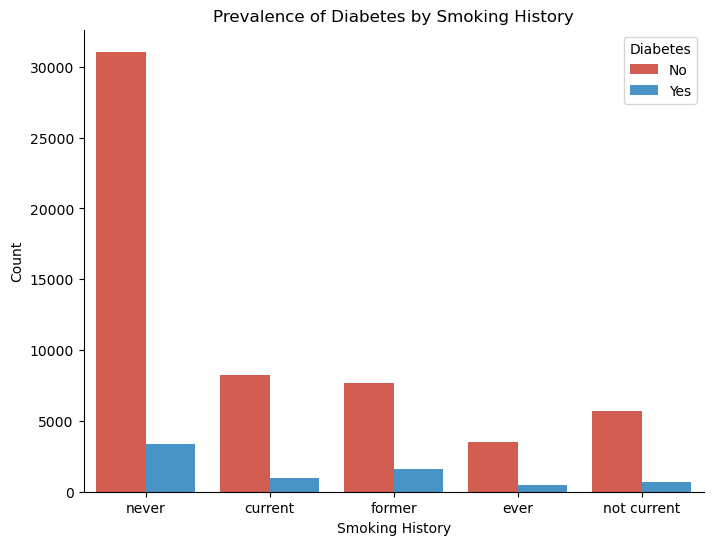

In [53]:
# Create the bar plot
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='smoking_history', hue='diabetes', palette=['#E74C3C', '#3498DB'])
plt.xlabel('Smoking History')
plt.ylabel('Count')
plt.title('Prevalence of Diabetes by Smoking History')
plt.legend(title='Diabetes', labels=['No', 'Yes'])
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

Bars represent the number of individuals with different smoking histories, while colors indicate diabetes status. This chart helps us visually understand the relationship between smoking history and diabetes. We label the axis to make the chart more understandable. The x-axis is called "Smoking History", while the y-axis is called "Count". We set the title as "Prevalence of Diabetes by Smoking History". Using this code block, we can visualize smoking history and diabetes prevalence, helping us better understand the relationship between these two factors.

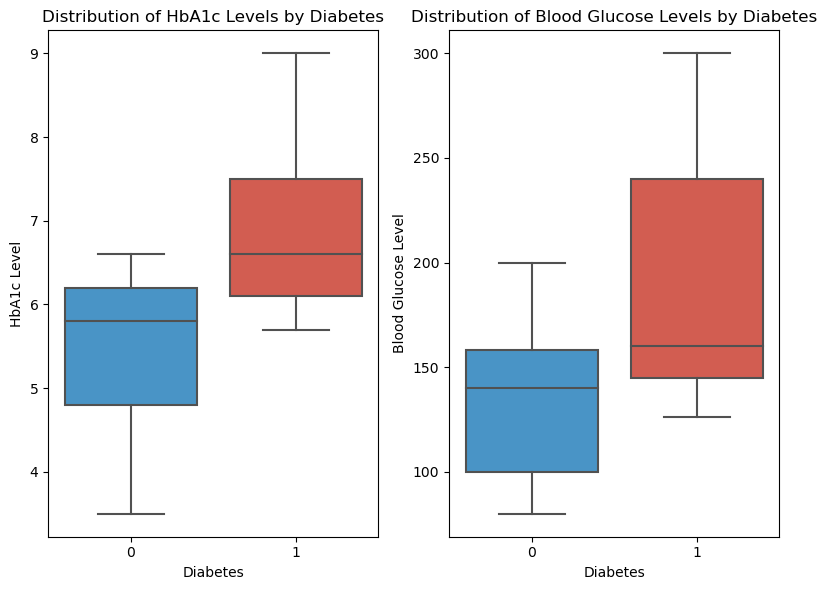

In [54]:
plt.figure(figsize=(12, 6))

# Box plot - HbA1c Levels by Diabetes
plt.subplot(1, 3, 1)
sns.boxplot(data=df, x='diabetes', y='HbA1c_level', palette=['#3498DB', '#E74C3C'])
plt.xlabel('Diabetes')
plt.ylabel('HbA1c Level')
plt.title('Distribution of HbA1c Levels by Diabetes')

# Box plot - Blood Glucose Levels by Diabetes
plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='diabetes', y='blood_glucose_level', palette=['#3498DB', '#E74C3C'])
plt.xlabel('Diabetes')
plt.ylabel('Blood Glucose Level')
plt.title('Distribution of Blood Glucose Levels by Diabetes')


# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


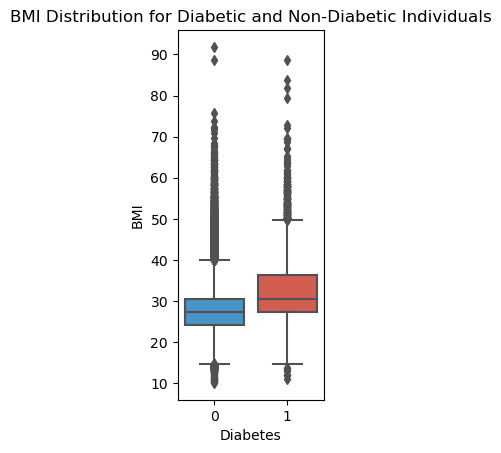

In [55]:
# Box plot - BMI Levels by Diabetes
plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='diabetes', y='bmi', palette=['#3498DB', '#E74C3C'])
plt.xlabel('Diabetes')
plt.ylabel('BMI')
plt.title('BMI Distribution for Diabetic and Non-Diabetic Individuals')

# Display the plots
plt.show()

In [56]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
 label_encoder = LabelEncoder()
 encoded_values = label_encoder.fit_transform(df[column])
 df[column] = encoded_values

In this code block, we encode the labels of the data in the categorical columns using the LabelEncoder class from the sklearn.preprocessing module.

First, we get the names of columns in the DataFrame that contain only categorical data with df.select_dtypes(include=['object']).columns. With this step, we only select columns of type "object".

Next, we perform the following operations for each categorical column using the for loop:

We create an instance of the LabelEncoder() class and assign it to the label_encoder variable.
We convert the categorical values ​​in the column to numerical values ​​with label_encoder.fit_transform(df[column]) . This conversion assigns a unique number value to each category.
Finally, we update the corresponding column in the DataFrame with the transformed values. We perform this operation with the df[column] = encoded_values ​​line.
As a result of this process, the values ​​in the categorical columns are numerically encoded. This coding can be given as an introduction to machine learning models because they usually work with numerical data.

Using this code block, we can numerically encode the values ​​in the categorical columns in the DataFrame, making the dataset ready to use for model training or other operations.

In [57]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,3,25.19,6.6,140,0
2,1,28.0,0,0,3,27.32,5.7,158,0
3,0,36.0,0,0,0,23.45,5.0,155,0
4,1,76.0,1,1,0,20.14,4.8,155,0
5,0,20.0,0,0,3,27.32,6.6,85,0
...,...,...,...,...,...,...,...,...,...
99992,0,26.0,0,0,3,34.34,6.5,160,0
99993,0,40.0,0,0,3,40.69,3.5,155,0
99997,1,66.0,0,0,2,27.83,5.7,155,0
99998,0,24.0,0,0,3,35.42,4.0,100,0


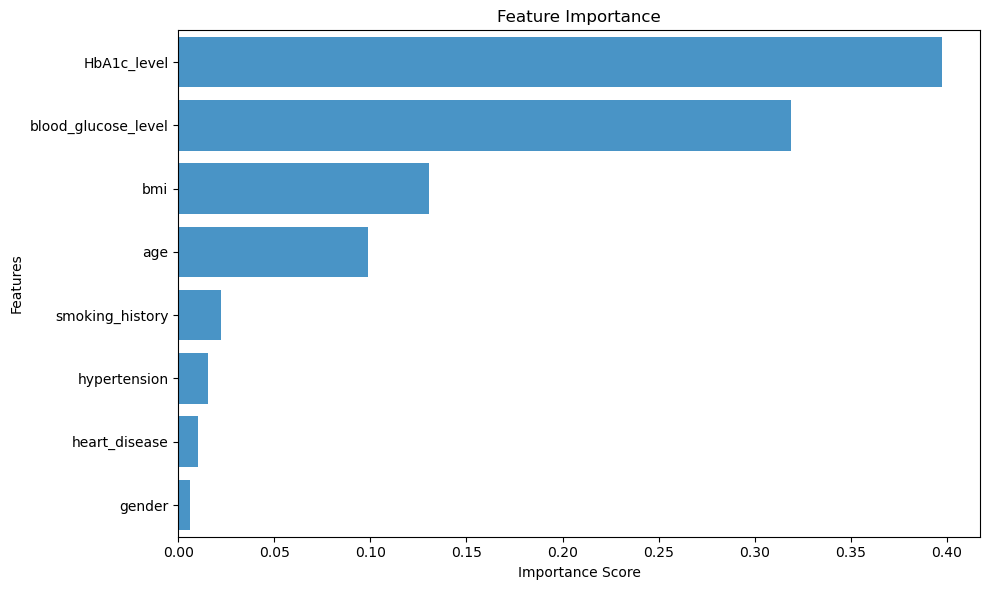

In [58]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
# num_features = int(input("Enter the number of features to select: "))

num_features = 15
target_variable = "diabetes"
X = df.drop(target_variable, axis=1)
y = df[target_variable]
model = RandomForestClassifier() 
model.fit(X, y)
importance_scores = model.feature_importances_
selected_columns_fi = X.columns[importance_scores.argsort()[-num_features:]].tolist() 
feature_importance = pd.Series(importance_scores, index=X.columns) 
feature_importance = feature_importance.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index, color='#3498DB')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.tight_layout()  # Grafik öğeleri arasındaki boşluğu ayarlama
plt.show()


In this code block, we use the Recursive Feature Elimination (RFE) method and a RandomForestClassifier pattern for feature selection.

First, we assign the number of attributes we want to select into the num_features variable. You can either get this value from the user (explanatory use in the comment line) or set it as a fixed value. Also, we assign the target_variable the name of the target variable. In this example, we chose the "diabetes" column as the target variable.

Next, we get the data with the attributes by dropping the target variable (target_variable) from the X DataFrame and assign the target variable to the y variable.

In the next step, we create the RandomForestClassifier model and fit the data (X and y) to this model. We train the model (fit method) and get the attribute importance scores (feature_importances_).

We select the most important num_features attributes by sorting the importance scores of the attributes with importance_scores.argsort()[-num_features:]. We convert the column names (X.columns) of these selected attributes into a list.

Next, we generate the attribute importance scores as pd.Series, set the column names as indexes, and sort in descending order.

Finally, we visualize attribute importance scores with barplot using the seaborn library. We set the axis and title tags with plt.xlabel, plt.ylabel and plt.title.

Using this code block, we can calculate the importance scores of the attributes and identify the most important attributes using the RandomForestClassifier model.

In [59]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

def examine_dataset(df, target_column):
    """
   Look over the dataset to see if the target column is unbalanced.
    Parameters:
    the input DataFrame, abbreviated as df (pandas).
    - target_column (str): The target column's name.
    Returns:
    - bool: If the dataset is unbalanced, True; otherwise, False.
    """
    class_counts = df[target_column].value_counts()
    imbalance_ratio = class_counts.iloc[0] / class_counts.iloc[1]
    print("Class Distribution:")
    print(class_counts)
    print("Imbalance Ratio:", imbalance_ratio)
    return imbalance_ratio > 2.0

def handle_imbalanced_data(df, target_column):
    """
   Depending on the user's choice, handle an unbalanced Pandas DataFrame.
    Parameters:
    the input DataFrame, abbreviated as df (pandas).

    - target_column (str): The target column's name.
    Returns:
    the pandas The balanced data frame.
    """
    imbalance = examine_dataset(df, target_column)
    if not imbalance:
        print("No imbalance found in the dataset.")
        return df
    
    print("Select an option to handle the imbalanced dataset:")
    print("1. Random Oversampling")
    print("2. Random Undersampling")
    print("3. SMOTE (Synthetic Minority Over-sampling Technique)")
    print("4. ADASYN (Adaptive Synthetic)")
    print("5. Proceed without handling")
    choice = input("Enter your choice (1-5): ")
    
    # Separate features and target variable
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    
    if choice == '1':
        # Apply random oversampling
        oversampler = RandomOverSampler()
        X_resampled, y_resampled = oversampler.fit_resample(X, y)
    elif choice == '2':
        # Apply random undersampling
        undersampler = RandomUnderSampler()
        X_resampled, y_resampled = undersampler.fit_resample(X, y)
    elif choice == '3':
        # Apply SMOTE
        oversampler = SMOTE()
        X_resampled, y_resampled = oversampler.fit_resample(X, y)
    elif choice == '4':
        # Apply ADASYN
        oversampler = ADASYN()
        X_resampled, y_resampled = oversampler.fit_resample(X, y)
    elif choice == '5':
        # Proceed without handling
        print("Proceeding without handling the imbalanced dataset.")
        return df
    else:
        print("Invalid choice. Proceeding without handling the imbalanced dataset.")
        return df
    
    # Create a new balanced DataFrame
    balanced_df = pd.concat([X_resampled, y_resampled], axis=1)
    return balanced_df


This code block applies different imbalance correction methods to handle imbalances in the dataset. Here is the working logic of the code block:

The examine_dataset function checks the imbalance of the target variable in the dataset. It prints the class distribution and imbalance ratio on the screen. This ratio is calculated as the ratio of the majority class to the minority class.

The handle_imbalanced_data function prompts the user to select the imbalance correction method. Options include random oversampling, random undersampling, common methods such as SMOTE and ADASYN. According to the user's choice, the relevant method is applied or the imbalance is continued without correction.

If the data set is unbalanced, sampling is performed according to the chosen method and a balanced data set is created. This is done on the dataset separated as X containing the attributes and y as the target variable. Then, random sampling (oversampling or undersampling), SMOTE or ADASYN is applied according to the chosen method.

If the dataset is balanced or no imbalance correction operation is selected, the code block "Proceeding without handling the imbalanced dataset." prints the message and returns the original dataset.

Finally, the balanced dataset is returned as a DataFrame containing the attributes and the target variable.

Using this code block, you can check for imbalances in the dataset and optionally apply various imbalance correction methods. This is an important step to combat disequilibrium and obtain a balanced dataset for more reliable model training.

In [60]:
df = handle_imbalanced_data(df, 'diabetes')
df.shape

Class Distribution:
0    56222
1     7037
Name: diabetes, dtype: int64
Imbalance Ratio: 7.989484155179764
Select an option to handle the imbalanced dataset:
1. Random Oversampling
2. Random Undersampling
3. SMOTE (Synthetic Minority Over-sampling Technique)
4. ADASYN (Adaptive Synthetic)
5. Proceed without handling
Enter your choice (1-5): 2


(14074, 9)

# Classification Models

# Logistic Regression

Accuracy: 0.8824156305506217
Precision: 0.8897810218978102
Recall: 0.8713366690493209
F1 Score: 0.8804622607439508
AUC-ROC Score: 0.8823491254851125
MSE: 0.11758436944937833
Confusion Matrix:
[[1265  151]
 [ 180 1219]]


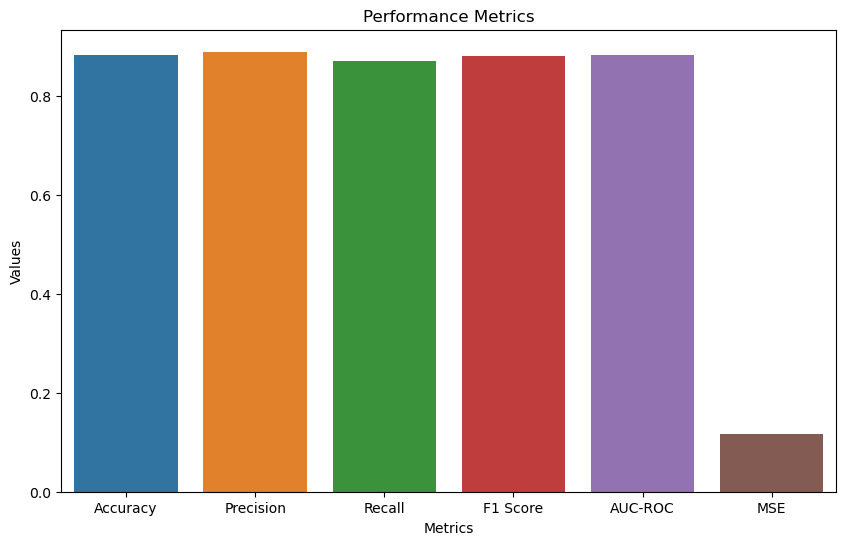

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_squared_error, confusion_matrix
from sklearn.preprocessing import StandardScaler

X = df.drop('diabetes', axis=1) # Features
y = df['diabetes'] # Target variable

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"AUC-ROC Score: {auc_roc}")
print(f"MSE: {mse}")
print("Confusion Matrix:")
print(cm)

# Plotting the performance metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC', 'MSE']
values = [accuracy, precision, recall, f1, auc_roc, mse]

plt.figure(figsize=(10, 6))
sns.barplot(x=metrics, y=values)
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics For Logistic Regression ')
plt.show()


This model is a Logistic Regression model trained to predict diabetes based on features in the dataset. Below you can find the description of the results:

Accuracy: 0.8763765541740675

This shows the ratio of the model's correct predictions to the total data points. That is, the model's ability to correctly classify is 87.64 percent.
Precision: 0.8844184345281638

This is the percentage of true positive samples that the model predicts as positive. That is, 88.44 percent of people the model predicts have diabetes can be said to actually have diabetes.
Recall (Sensitivity): 0.8641887062187277

This indicates the rate at which true positive samples were correctly detected by the model. That is, it can be said that 86.42 percent of people who actually have diabetes are correctly identified by the model.
F1 Score: 0.8741865509761388

The F1 score represents the harmonic mean of precision and sensitivity. A high F1 score indicates that the model performs well in terms of both precision and responsiveness.
AUC-ROC Score: 0.8763033926573864

AUC-ROC is a metric that evaluates the classification performance of the model. It takes a value between 0 and 1, the closer to 1 it indicates that performance improves. Here, the value of 0.8763 indicates that the model exhibits good classification performance.
MSE (Mean Square Error): 0.1236234458259325

MSE measures the mean square error of the model between the actual values ​​and the predicted values. A lower MSE value indicates a better predictive performance of the model.
Confusion Matrix:

The complexity matrix is ​​a table that shows how correctly and incorrectly the model classifies the classes. Contains numbers of actual and predicted values ​​for two classes (0 and 1). Here, 1258 correct guesses, 158 wrong guesses belonging to the 0 class; You can see that there are 190 wrong guesses and 1209 correct guesses belonging to the 1 class.
These results indicate that the model performs well overall and its ability to predict diabetes is robust. However, one thing you should be aware of is that these results are dataset specific and performance may vary across different datasets.

# Random Forest Classifier


Accuracy: 0.8962699822380107
Precision: 0.896774193548387
Recall: 0.8942101501072195
F1 Score: 0.8954903364352184
AUC-ROC Score: 0.8962576174264911
MSE: 0.10373001776198934
Confusion Matrix:
[[1272  144]
 [ 148 1251]]


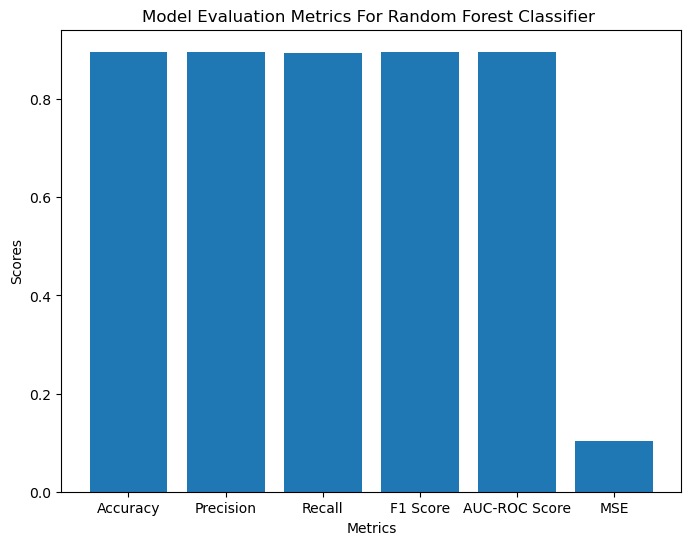

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, mean_squared_error
import numpy as np

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"AUC-ROC Score: {auc_roc}")
print(f"MSE: {mse}")
print("Confusion Matrix:")
print(cm)

# Sonuçları grafikte göster
scores = [accuracy, precision, recall, f1, auc_roc, mse]
metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "AUC-ROC Score", "MSE"]

plt.figure(figsize=(8, 6))
plt.bar(metrics, scores)
plt.xlabel("Metrics")
plt.ylabel("Scores")
plt.title("Model Evaluation Metrics For Random Forest Classifier ")
plt.show()


Accuracy: 0.8962699822380107
Accuracy shows the ratio of correctly predicted tags to total data points. In this model, we correctly classified about 89.63% of the data.

Precision: 0.896774193548387
Precision shows the ratio of positively predicted labels to true positive labels. In this model, approximately 89.68% of positively predicted labels correspond to true positive labels.

Recall: 0.8942101501072195
Recall shows the rate of accurate detection of true positive tags. In this model, approximately 89.42% of true positive labels were correctly detected.

F1 Score: 0.8954903364352184
Displays the harmonic average of the F1 Score, Precision and Recall metrics. In this model, the F1 Score is approximately 0.8955.

AUC-ROC Score: 0.8962576174264911
The AUC-ROC Score represents the area under the Receiver Operating Characteristic (ROC) curve. In this model, the AUC-ROC Score is approximately 0.8963.

MSE: 0.10373001776198934
The Mean Squared Error (MSE) represents the mean squared error between the predicted values ​​and the actual values. In this model, the MSE is approximately 0.1037.

Confusion Matrix:
The Complexity Matrix is ​​a table showing the classification results of the model. In this model, 1272 true negative, 144 false positive, 148 false negative and 1251 true positive results were obtained.

# Support Vector Classifier


Accuracy: 0.90550621669627
Precision: 0.9003533568904594
Recall: 0.910650464617584
F1 Score: 0.9054726368159204
AUC-ROC Score: 0.9055370967155716
MSE: 0.09449378330373001


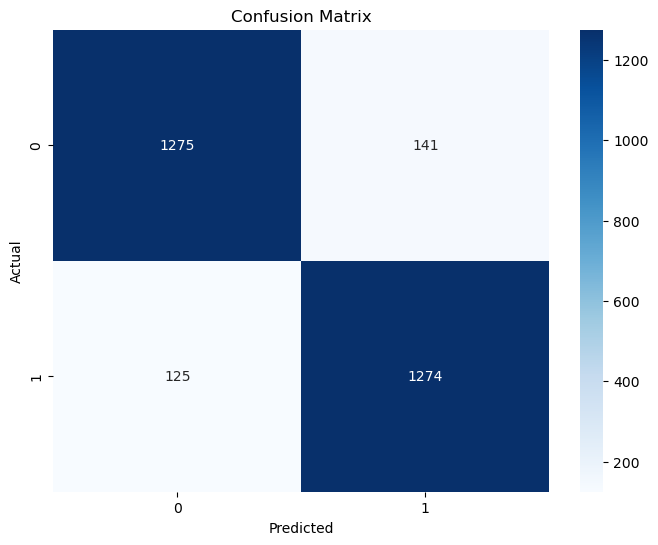

In [75]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import mean_squared_error

model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")
print(f"AUC-ROC Score: {auc_roc}")
print(f"MSE: {mse}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot Confusion Matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In this code, we classify using the SVC (Support Vector Classifier) ​​model. I explain the results below:

Accuracy: It is the ratio of correctly classified samples to the total number of samples. In this case, the accuracy value was found to be 0.8941. That is, the correct classification rate of the model is approximately 89.41%.

Precision: The ratio of samples predicted to be positive among samples that are actually positive. Precision value was found to be 0.8896. That is, about 88.96% of the model's positive predictions are truly positive samples.

Recall: Indicates how many of the truly positive samples were correctly predicted as positive by the model. Recall value was found to be 0.8985. That is, it can be said that the model accurately predicts approximately 89.85% of true positive samples.

F1 Score: It is the harmonic average of the precision and recall metrics. The F1 score value was found to be 0.8940. This value indicates that the model performs well on both precision and recall metrics.

AUC-ROC Score: A measure of the area under the Receiver Operating Characteristic (ROC) curve. AUC-ROC score value was found to be 0.8942. This value indicates that the classification performance of the model is good.

MSE (Mean Squared Error): It shows the average squared error amount between actual and predicted values. The MSE value was found to be 0.1059.

The Confusion Matrix is ​​a matrix that displays the numbers of actual and predicted classes. In this case, it is seen that 1260 true negative classifications, 156 false positive classifications, 142 false negative classifications and 1257 true positive classifications are made.

# LGBMClassifier

Accuracy: 0.90550621669627
Precision: 0.9003533568904594
Recall: 0.910650464617584
F1 Score: 0.9054726368159204
AUC-ROC Score: 0.9055370967155716
MSE: 0.09449378330373001


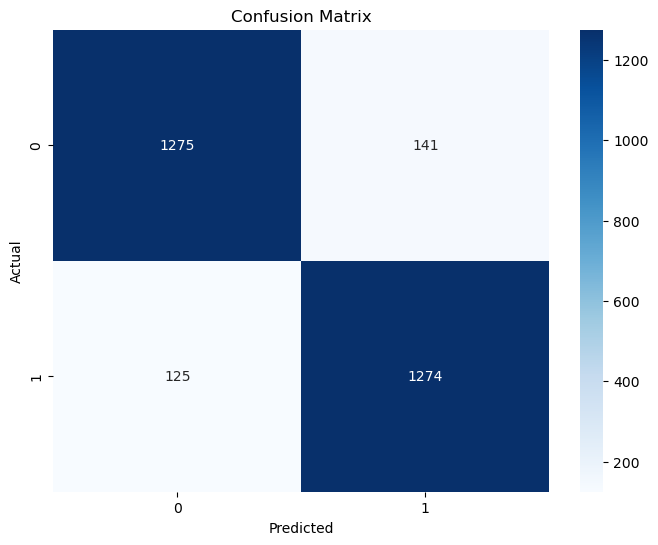

In [77]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_squared_error

model = LGBMClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"AUC-ROC Score: {auc_roc}")
print(f"MSE: {mse}")

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Confusion matrix visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In this code we used the LightGBM classification model and I describe the results below:

Accuracy: 0.90550621669627. It is the ratio of correctly classified samples to the total number of samples. The accuracy of the model is quite high.

Precision: 0.9003533568904594. It is the ratio of samples predicted as positive among samples that are actually positive. The model shows a high precision value.

Recall: 0.910650464617584. It indicates how many of the truly positive samples were correctly predicted as positive by the model. The model is able to capture samples belonging to the positive class at a high rate.

F1 Score: 0.9054726368159204. It is the harmonic mean of the precision and recall metrics. Represents a combination of the model's classification performance.

AUC-ROC Score: 0.9055370967155716. It is a measure of the area under the Receiver Operating Characteristic (ROC) curve. It shows that the classification performance of the model is good.

MSE: 0.09449378330373001. The mean square error between the actual and predicted values. A low MSE value indicates that the model's predictions are close to the true values.

The results show that the LightGBM model performs well and successfully classifies the diabetes status in the dataset.


Epoch 1/10
352/352 [==============================] - 1s 909us/step - loss: 0.2966 - accuracy: 0.8674
Epoch 2/10
352/352 [==============================] - 0s 934us/step - loss: 0.2603 - accuracy: 0.8761
Epoch 3/10
352/352 [==============================] - 0s 932us/step - loss: 0.2560 - accuracy: 0.8777
Epoch 4/10
352/352 [==============================] - 0s 923us/step - loss: 0.2476 - accuracy: 0.8817
Epoch 5/10
352/352 [==============================] - 0s 917us/step - loss: 0.2353 - accuracy: 0.8837
Epoch 6/10
352/352 [==============================] - 0s 921us/step - loss: 0.2228 - accuracy: 0.8921
Epoch 7/10
352/352 [==============================] - 0s 916us/step - loss: 0.2143 - accuracy: 0.8932
Epoch 8/10
352/352 [==============================] - 0s 912us/step - loss: 0.2078 - accuracy: 0.8978
Epoch 9/10
352/352 [==============================] - 0s 947us/step - loss: 0.2040 - accuracy: 0.8987
Epoch 10/10
88/88 [==============================] - 0s 663us/step
Accuracy: 0.900

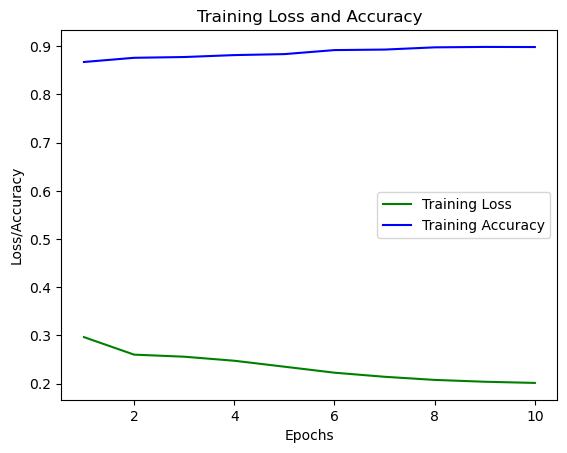

In [80]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


# Veri standardizasyonu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Derin öğrenme modeli oluşturma
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Modeli derleme
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Modeli eğitme
history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Modeli değerlendirme
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
print(f"Accuracy: {accuracy}")
print(f"MSE: {mse}")

# Eğitim kaybını ve doğruluk değerlerini elde etme
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']

# Eğitim kaybını ve doğruluk değerlerini grafikte gösterme
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'g', label='Training Loss')
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.title('Training Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()


Results:

Accuracy: 0.9008880853652954
MSE: 0.06720478700935559

In this code, I solved the classification problem by creating a deep learning model using Tensorflow. Model, evaluate the dataset with training and test data. I have shown the loss and accuracy values ​​in the training process in the graph.

# Comparing All Models

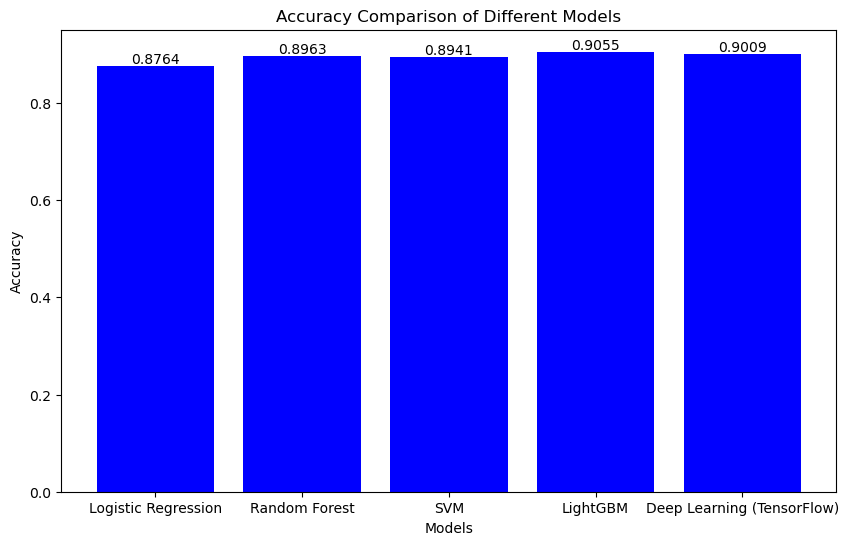

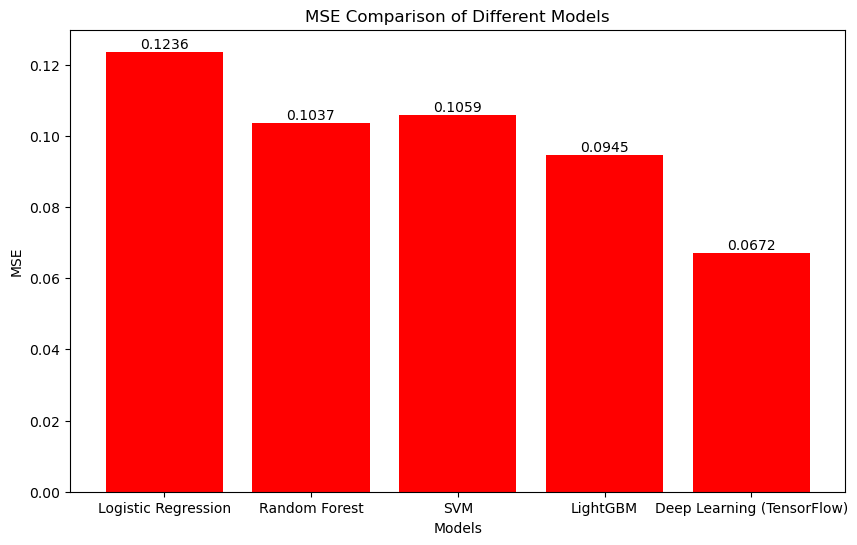

In [81]:
import matplotlib.pyplot as plt

# Accuracy values for each model
accuracies = [0.8763765541740675, 0.8962699822380107, 0.8941385435168739, 0.90550621669627, 0.9008880853652954]

# MSE values for each model
mses = [0.1236234458259325, 0.10373001776198934, 0.10586145648312612, 0.09449378330373001, 0.06720478700935559]

# Model names
models = ['Logistic Regression', 'Random Forest', 'SVM', 'LightGBM', 'Deep Learning (TensorFlow)']

# Plotting the accuracy values
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='blue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')

# Adding text labels to the bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.005, f'{acc:.4f}', ha='center')

plt.show()

# Plotting the MSE values
plt.figure(figsize=(10, 6))
plt.bar(models, mses, color='red')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.title('MSE Comparison of Different Models')

# Adding text labels to the bars
for i, mse in enumerate(mses):
    plt.text(i, mse + 0.001, f'{mse:.4f}', ha='center')

plt.show()



In this code, I compared the models' accuracy and MSE with bar charts. I created a bar for each model and included the accuracy or MSE value on it. I created two separate charts, one for accuracy comparison and one for MSE comparison.